In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv('news.csv')

In [3]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
data.isnull().sum()  

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [5]:
data.drop(['Unnamed: 0','title'],axis=1,inplace=True)

In [6]:
data['label']=data['label'].map({'REAL':0,'FAKE':1})

In [7]:
data.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,U.S. Secretary of State John F. Kerry said Mon...,0
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,It's primary day in New York and front-runners...,0


In [8]:
def preprocessing(text):
    text = text.strip()                         #Removes Extra White Spaces
    text = text.lower()                         #lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)     #Removes special characters
    
    return text

In [9]:
data['Clean']=data['text'].apply(preprocessing)

In [10]:
X_train, x_test, y_train, y_test = train_test_split(data['Clean'], 
                                                    data['label'],test_size=0.2, 
                                                    random_state=42)

In [11]:
vectorizer = CountVectorizer(binary=True, max_features=800)  
# Fit and transform 
X_train_binary = vectorizer.fit_transform(X_train)
x_test_binary = vectorizer.transform(x_test)

# Convert to a DataFrame for better visualization
df_binary = pd.DataFrame(X_train_binary.toarray(), columns=vectorizer.get_feature_names_out())


df_binary.head()

,10,11,15,20,2008,2012,2013,2014,2015,2016,...,wrong,wrote,year,years,yet,york,you,young,your,youre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
3,0,0,0,1,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,1
4,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
vectorizer = CountVectorizer(max_features=500)  

# Fit and transform the 
X_train_count = vectorizer.fit_transform(X_train)
x_test_count = vectorizer.transform(x_test)
# Convert to a DataFrame for better visualization
df_train_count = pd.DataFrame(X_train_count.toarray(), columns=vectorizer.get_feature_names_out())

df_train_count.head()

,10,2012,2016,able,about,according,across,act,action,actually,...,working,world,would,wrote,year,years,yet,york,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,0,0,4,1
3,0,0,1,0,2,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,2
4,0,0,2,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [13]:
vectorizer = TfidfVectorizer(max_features=10000)  

# Fit and transform the 
X_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf= vectorizer.transform(x_test)
# Convert to a DataFrame for better visualization
df_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

df_tfidf

,01,10,100,1000,10000,100000,101,10th,10year,11,...,zervos,zika,zionism,zionist,zionists,zone,zones,zuckerberg,zulu,zulus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X = X_train_tfidf
y = y_train
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [15]:
y_pred=clf.predict(x_test_tfidf)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 91.55%


In [16]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_test_scaled = scaler.transform(x_test_tfidf)
clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
y_pred=clf.predict(X_test_scaled)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.19%


In [18]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[594  45]
 [ 54 574]]


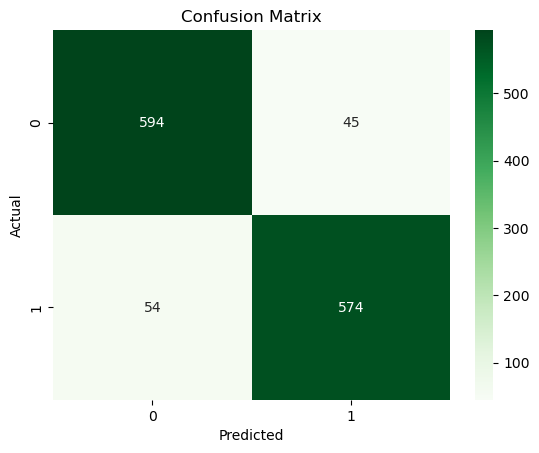

In [20]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       639
           1       0.93      0.91      0.92       628

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267

